In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
core_data = pd.read_csv("data/poro-perm.csv", na_values=' ')

In [8]:
core_data.head()

,well,form,sample,core,orient,depth,log depth,tvdss,rho_g,rho_b,rho_fl,fluid,mud,description,Unnamed: 14,por_1000,ka_1000,kb_1000
0,Freeman-4,690,1**,1,NaN,8272.20,8282.20,8198.12,2.62,2.301,NaN,oil,obm,"shly sst, dk gry, vf gr, wl srt, arg, consol, ...",NaN,19.3,3.3,NaN
1,Freeman-4,690,2**,1,NaN,8274.30,8284.30,8200.12,2.61,2.297,NaN,oil,obm,"shly sst, dk gry, vf gr, wl srt, arg, org carb...",NaN,18.4,2.0,NaN
2,Freeman-4,690,3,2,NaN,8327.45,8340.45,8256.09,2.65,2.176,NaN,oil,obm,"Sst, brn-gry, vf gr, wl srt, sli shly, arg, or...",NaN,32.5,590.0,307.0
3,Freeman-4,690,4,2,NaN,8327.90,8340.90,8256.59,2.65,2.138,NaN,oil,obm,"Sst, brn-gry, vf-f gr, wl srt, sli shly, arg, ...",NaN,32.9,1050.0,652.0
4,Freeman-4,690,5,2,NaN,8328.75,8341.75,8257.59,2.63,2.077,NaN,oil,obm,"Sst, brn-gry, vf-f gr, wl srt, mica, mass, pr cmt",NaN,36.7,2610.0,800.0


In [9]:
core_data.describe()

,form,core,orient,depth,log depth,tvdss,rho_g,rho_b,rho_fl,Unnamed: 14,por_1000,ka_1000,kb_1000
count,112.000000,112.000000,0.0,112.000000,112.000000,112.000000,111.000000,112.000000,0.0,0.0,111.000000,111.000000,101.000000
mean,697.205357,2.473214,NaN,8580.722768,8591.279018,8500.312857,2.647928,2.067152,NaN,NaN,31.020721,4510.245766,1141.469307
std,18.528837,1.138672,NaN,373.339356,375.183982,329.654256,0.014467,0.118935,NaN,NaN,5.187066,3460.132112,740.314558
min,690.000000,1.000000,NaN,8272.200000,8282.200000,8198.120000,2.560000,1.919000,NaN,NaN,15.300000,0.270000,3.400000
25%,690.000000,2.000000,NaN,8418.187500,8421.187500,8336.790000,2.640000,1.975750,NaN,NaN,30.000000,837.500000,652.000000
50%,690.000000,2.000000,NaN,8460.250000,8476.250000,8394.980000,2.650000,2.027000,NaN,NaN,32.400000,4510.000000,1130.000000
75%,702.000000,4.000000,NaN,8704.450000,8716.450000,8634.980000,2.660000,2.111000,NaN,NaN,34.250000,7430.000000,1580.000000
max,803.000000,4.000000,NaN,10663.200000,10682.200000,10283.930000,2.690000,2.417000,NaN,NaN,37.700000,11480.000000,3600.000000


<AxesSubplot:xlabel='por_1000', ylabel='ka_1000'>

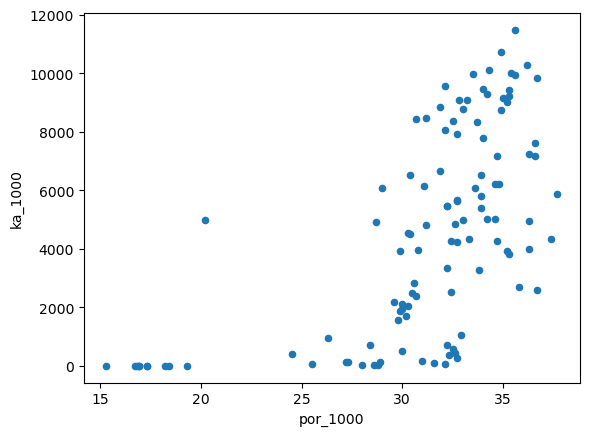

In [10]:
core_data.plot(kind="scatter", x="por_1000", y="ka_1000")

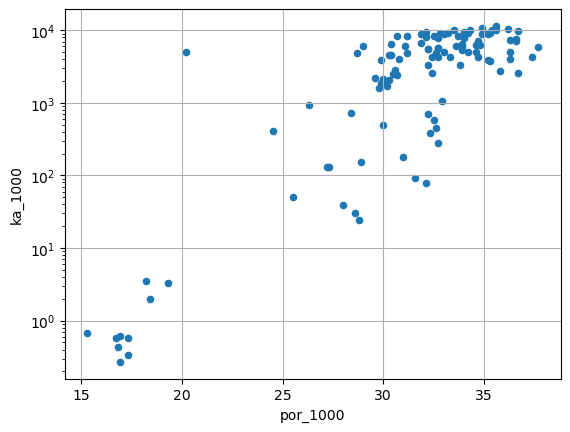

In [11]:
core_data.plot(kind="scatter", x="por_1000", y="ka_1000")
plt.yscale('log')
plt.grid(True)

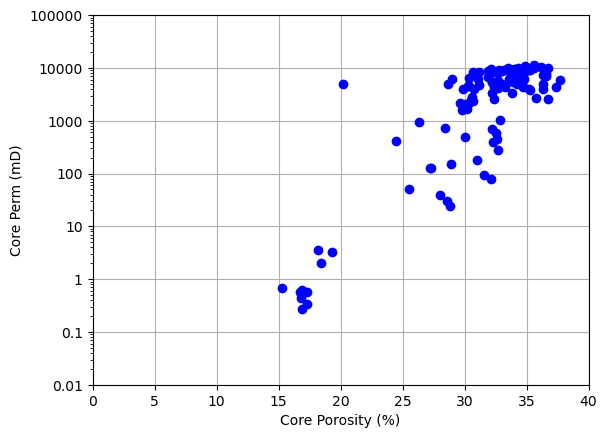

In [12]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 40, 0.01, 100000])
ax.plot(core_data['por_1000'], core_data['ka_1000'], 'bo')
ax.set_yscale('log')
ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
plt.savefig('11-xplot-semi-log-fixed.png', dpi=300)

In [13]:
poro_perm = core_data[['por_1000', 'ka_1000']].copy()

In [14]:
poro_perm.dropna(inplace=True)

In [15]:
poro_perm_polyfit = np.polyfit(poro_perm['por_1000'], np.log10(poro_perm['ka_1000']), 1)

In [16]:
poro_perm_polyfit

array([ 0.19997893, -3.06967406])

In [17]:
import statsmodels.api as sm

x = core_data['por_1000']
x = sm.add_constant(x)
y = np.log10(core_data['ka_1000'])

In [18]:
x

,const,por_1000
0,1.0,19.3
1,1.0,18.4
2,1.0,32.5
3,1.0,32.9
4,1.0,36.7
...,...,...
107,1.0,34.9
108,1.0,32.1
109,1.0,24.5
110,1.0,28.9


In [19]:
model = sm.OLS(y, x, missing='drop')
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ka_1000   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     331.0
Date:                Mon, 01 May 2023   Prob (F-statistic):           8.22e-35
Time:                        16:45:21   Log-Likelihood:                -99.418
No. Observations:                 111   AIC:                             202.8
Df Residuals:                     109   BIC:                             208.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0697      0.346     -8.880      0.000      -3.755      -2.385
por_1000       0.2000      0.011     18.193      0.000       0.178       0.222
==============================================================================
Omnibus:                       16.499   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.422
Skew:                           0.461   Prob(JB):                     6.14e-10
Kurtosis:                       5.885   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
results.params

const      -3.069674
por_1000    0.199979
dtype: float64

In [22]:
results.params[1]

0.19997893185498664

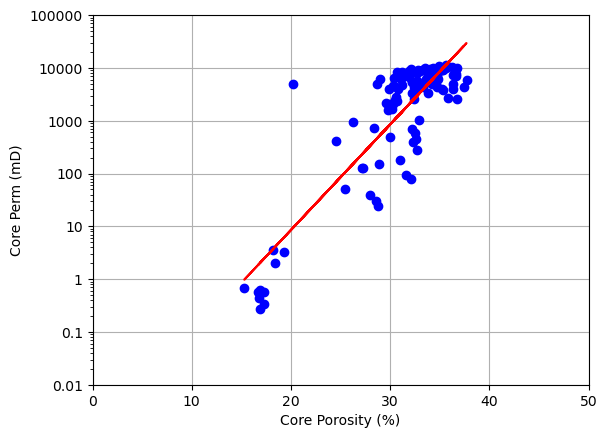

In [23]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 50, 0.01, 100000])
ax.semilogy(core_data['por_1000'], core_data['ka_1000'], 'bo')

ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

ax.semilogy(core_data['por_1000'], 10**(results.params[1] * core_data['por_1000'] + results.params[0]), 'r-')

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
plt.savefig('predicted_poro_perm_xplot.png', dpi=100)

In [24]:
import lasio
las = lasio.read('data/Freeman-004-ST1.las')
well1 = las.df()
well2 = well1.reset_index()

In [26]:
# Assuming your well data is in a pandas DataFrame called 'well_data'
# Filter the well data to only include sandstone with gamma ray values less than 75
well = well2[(well2['GR'] < 75)]

In [27]:
from class2 import Petrophysics

In [28]:
test = Petrophysics(well)

In [29]:
x = test.density_porosity(1, 2.26, 2.6, 1.1)

C:\Users\BUYPC COMPUTERS\Desktop\MY PROJECT\python_script\class2.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['PHI'] = porosity


In [30]:
well

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI
234,7681.5,2.2382,137.5070,39.0321,0.5983,NaN,0.0188
235,7682.0,2.2382,137.5070,39.0321,0.5983,NaN,0.0188
236,7682.5,2.2382,137.5070,39.0321,0.5983,0.9332,0.0188
237,7683.0,2.2382,137.5070,39.0321,0.5983,0.9332,0.0188
238,7683.5,2.2382,137.5070,39.0321,0.5983,0.9332,0.0188
...,...,...,...,...,...,...,...
6516,10822.5,2.1584,99.5215,71.7220,0.2090,3.6057,0.0876
6517,10823.0,2.1528,97.7799,57.5282,0.2262,7.0606,0.0924
6518,10823.5,2.1775,97.1061,53.7916,0.2328,12.6377,0.0711
6519,10824.0,2.1966,100.4818,62.1770,0.2523,18.4565,0.0547


In [31]:
well['PERM']= 10**(results.params[1] * (well['PHI']*100) + results.params[0])

C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_9680\827224244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['PERM']= 10**(results.params[1] * (well['PHI']*100) + results.params[0])


In [32]:
well.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM
234,7681.5,2.2382,137.507,39.0321,0.5983,NaN,0.0188,0.002024
235,7682.0,2.2382,137.507,39.0321,0.5983,NaN,0.0188,0.002024
236,7682.5,2.2382,137.507,39.0321,0.5983,0.9332,0.0188,0.002024
237,7683.0,2.2382,137.507,39.0321,0.5983,0.9332,0.0188,0.002024
238,7683.5,2.2382,137.507,39.0321,0.5983,0.9332,0.0188,0.002024


In [33]:
well.to_csv('data/freeman_well_4_perm_sand.csv', index=False)

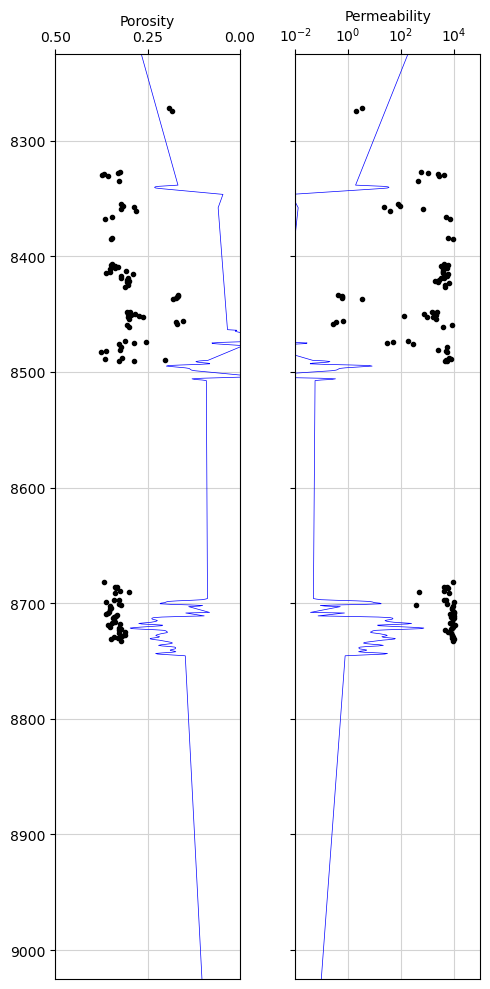

In [34]:
fig, ax = plt.subplots(figsize=(5,10))
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1, sharey = ax1)

# Porosity track
ax1.plot(core_data["por_1000"]/100, core_data['depth'], color = "black", marker='.', linewidth=0)
ax1.plot(well['PHI'], well['DEPT'], color ='blue', linewidth=0.5)
ax1.set_xlabel("Porosity")
ax1.set_xlim(0.5, 0)
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.set_xticks([0.5,  0.25, 0])

# Permeability track
ax2.plot(core_data["ka_1000"], core_data['depth'], color = "black", marker='.', linewidth=0)
ax2.plot(well['PERM'], well['DEPT'], color ='blue', linewidth=0.5)
ax2.set_xlabel("Permeability")
ax2.set_xlim(0.1, 100000)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.set_xticks([0.01, 1, 10, 100, 10000])
ax2.semilogx()

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2]:
    ax.set_ylim(9025, 8225)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
# Removes the y axis labels on the second track
for ax in [ax2]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.3)
plt.savefig('images/final_track_plot.png', dpi=100)

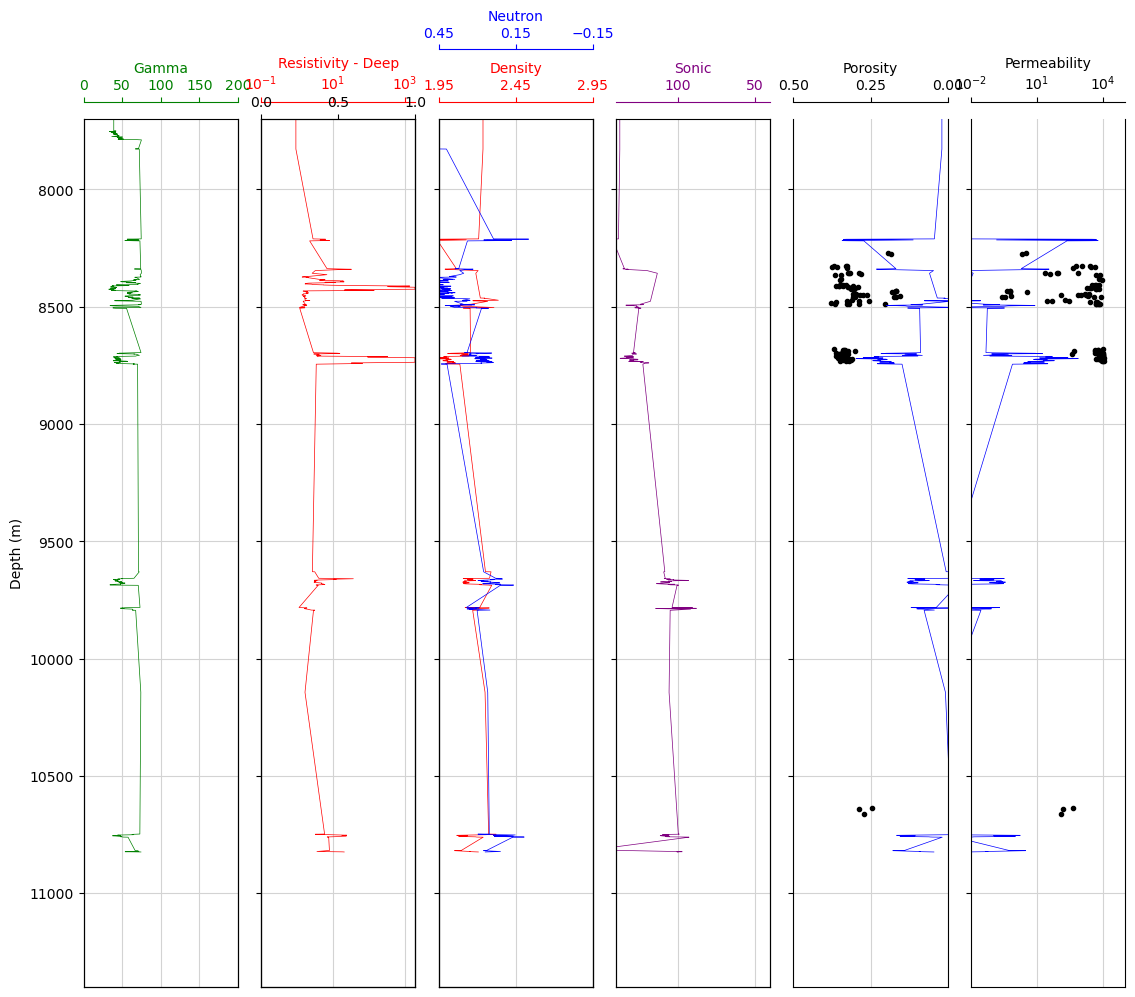

In [35]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,8), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,8), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,8), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,8), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
# ax6 = plt.subplot2grid((1,8), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax2.twiny()
ax8 = plt.subplot2grid((1,8), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax9 = plt.subplot2grid((1,8), (0,5), rowspan=1, colspan = 1, sharey = ax1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
# ax14 = ax6.twiny()
# ax14.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot(well["GR"], well['DEPT'], color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot(well["RES_DEP"], well['DEPT'], color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity - Deep")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot(well["DEN"], well['DEPT'], color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot(well["DT"], well['DEPT'], color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot(well["NEUT"], well['DEPT'], color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])

# Caliper track
# ax6.plot(well["CALI"], well['DEPTH'], color = "black", linewidth = 0.5)
# ax6.set_xlabel("Caliper")
# ax6.set_xlim(6, 16)
# ax6.xaxis.label.set_color("black")
# ax6.tick_params(axis='x', colors="black")
# ax6.spines["top"].set_edgecolor("black")
# ax6.fill_betweenx(well['DEPTH'], 8.5, well["CALI"], facecolor='yellow')
# ax6.set_xticks([6,  11, 16])

# Resistivity track - Curve 2
# ax7.plot(well["RMED"], well['DEPTH'], color = "green", linewidth = 0.5)
# ax7.set_xlabel("Resistivity - Med")
# ax7.set_xlim(0.2, 2000)
# ax7.xaxis.label.set_color("green")
# ax7.spines["top"].set_position(("axes", 1.08))
# ax7.spines["top"].set_visible(True)
# ax7.tick_params(axis='x', colors="green")
# ax7.spines["top"].set_edgecolor("green")
# ax7.set_xticks([0.1, 1, 10, 100, 1000])
# ax7.semilogx()

# Porosity track
ax8.plot(core_data["por_1000"]/100, core_data['depth'], color = "black", marker='.', linewidth=0)
ax8.plot(well['PHI'], well['DEPT'], color ='blue', linewidth=0.5)
ax8.set_xlabel("Porosity")
ax8.set_xlim(0.5, 0)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0.5,  0.25, 0])

# Permeability track
ax9.plot(core_data["ka_1000"], core_data['depth'], color = "black", marker='.', linewidth=0)
ax9.plot(well['PERM'], well['DEPT'], color ='blue', linewidth=0.5)
ax9.set_xlabel("Permeability")
ax9.set_xlim(0.1, 100000)
ax9.xaxis.label.set_color("black")
ax9.tick_params(axis='x', colors="black")
ax9.spines["top"].set_edgecolor("black")
ax9.set_xticks([0.01, 1, 10, 100, 10000])
ax9.semilogx()

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax8, ax9]:
    ax.set_ylim(11400, 7700)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
for ax in [ax2, ax3, ax4, ax8, ax9]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)
plt.savefig('images/poro-perm_full.png')

In [36]:
well.describe()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM
count,646.000000,646.000000,646.000000,646.000000,646.000000,644.000000,646.000000,646.000000
mean,8519.595201,2.177734,124.150528,49.320532,0.422319,203.702588,0.070922,35.757976
std,819.363687,0.085666,13.085836,11.622271,0.142256,566.000054,0.073849,352.916927
min,7681.500000,1.863100,87.851600,32.593900,0.099500,0.933200,-0.067200,0.000039
25%,7762.125000,2.137200,114.996100,39.032100,0.285825,0.933200,0.018800,0.002024
50%,8424.250000,2.211750,125.013050,44.858150,0.425950,1.886800,0.041600,0.005784
75%,8723.375000,2.238200,137.507000,58.436475,0.598300,10.569800,0.105825,0.111338
max,10824.500000,2.337900,158.538400,74.908400,0.656900,1950.000000,0.342200,5937.518657


In [37]:
import lasio
las = lasio.read('data/Freeman_003ST1.las')
well1 = las.df()
well = well1.reset_index()

In [38]:
test = Petrophysics(well)

In [40]:
x = test.density_porosity(1, 2.26, 2.6, 1.1)

In [41]:
well['PERM']= 10**(results.params[1] * (well['PHI']*100) + results.params[0])

In [42]:
well.to_csv('data/freeman_well_3_perm_4.csv', index=False)